In [ ]:
# CP1 
# 데이터 EDA 관련 내용 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from spacy.tokenizer import Tokenizer
import os
from tqdm import tqdm
from datetime import date
from datetime import datetime
import nltk 
import squarify
import matplotlib.pyplot as plt
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.options.plotting.backend = "plotly"
nltk.downloader.download('vader_lexicon')


from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.patches as mpatches

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/
%matplotlib inline

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
# 비트코인 트위터 관련 데이터 가져오기 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bitcoin_tweets.csv")  

# 필요없는 칼럼 제거 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 데이터 셔플 
df_shuffled=sklearn.utils.shuffle(df)
df_shuffled

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
319043,Hoba Bot,NaN,Fearless like a Honey Badger... Bears or Bulls...,2012-12-30 21:55:51,13144.0,7.0,143.0,False,2021-07-03 10:56:56,🚀🚀🚀 $ONT Long Position(v2) 🚀🚀🚀\n\nEntry: 0.717...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'ONTU...",HoBaBot,False
2561833,𝔡𝔢𝔣𝔦𝔱𝔯𝔞𝔩𝔦𝔷𝔢𝔡•pǝzıןɐɹʇıɟǝp,NaN,Defitralized © • DC of @_dcdao ...,2015-09-01 23:34:35,132.0,2387.0,8030.0,False,2022-03-15 09:40:37,10% discount\nhttps://t.co/1360Y2IRC7\n\n #BTC...,"['BTC', 'InLiqWeTrust']",Twitter for Android,False
2270121,GORE I.A.D,Deutschland,telegram https://t.co/ui9meh3B41\nMOD https://...,2021-12-03 13:05:19,44.0,397.0,5689.0,False,2022-02-09 18:35:47,@crypto_bearr Join us In #Aether Before the la...,"['Aether', 'ATH', 'AETHER', 'AETHERV2', 'BNB',...",Twitter for Android,False
1739679,satsleft.info,The Bitcoin Timechain,Reporting on the remaining #Bitcoin supply to ...,2021-10-14 21:31:42,92.0,251.0,12.0,False,2021-11-11 17:17:32,👋 A new block was found on the #Bitcoin networ...,"['Bitcoin', 'bitcoin', 'sats']",satsleft,False
1894850,Dweep,NaN,"Vocalist, Musician, Author\n-CRYPTO maniac-",2017-08-17 15:01:18,8.0,49.0,283.0,False,2021-11-25 16:01:31,@CryptoWhale Its just whale games. Plan B made...,['Bitcoin'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976429,CryptoCharts,Trade here 👉,#bitcoin Not financial advice. https://t.co/V2...,2015-09-09 23:06:47,2494.0,24.0,178.0,False,2021-12-30 18:01:07,Thoughts on $BTC #Bitcoin! See TradingMula's i...,['Bitcoin'],CryptoCharts Feed,False
1773212,Mitchigan,Unknown..,"Energy, society, money and love require a mutu...",2018-03-22 16:01:55,423.0,1670.0,94403.0,False,2021-11-19 12:02:33,That's precisely the point! #Bitcoin ie. Centr...,['Bitcoin'],Twitter for Android,False
968045,USEnergyUpdate,United States,U.S. #Energy Update - Insight on the Issues Af...,2019-08-18 01:05:20,69.0,281.0,934.0,False,2021-08-16 21:07:02,Energy execs find new market for their natural...,"['Bitcoin', 'NatGas']",Twitter for iPhone,False
2901180,Banxaboom,"Brüssel, Belgien",@banxaofficial Supporter ♥️ \n#btc #bitcoin\nn...,2021-11-06 20:15:29,53.0,687.0,2275.0,False,2022-04-20 23:45:08,@Da_Apez BANXA CVE: BNXA🚨 SOON NASDAQ! 🚨 This ...,"['crypto', 'bitcoin', 'btc', 'eth', 'ethereum'...",Twitter Web App,False


In [ ]:
# []: [] 사이 문자를 매치, ^: not
regex = r"[^a-zA-Z0-9 ]"

# 치환할 문자
subst = ""

def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)

    # 소문자로 치환
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
# 셔플된 데이터에서 10000개만 남기기 
# 빠른 전처리 & 분석을 하기 위함 
df1 = df_shuffled.head(10000)

df1['tokens'] = df1['text'].apply(tokenize)
df1['tokens'].head()

0    [blue, ridge, bank, shares, halted, by, nyse, ...
1    [today, thats, this, thursday, we, will, do, a...
2    [guys, evening, i, have, read, this, article, ...
3    [btc, a, big, chance, in, a, billion, price, 4...
4    [this, network, is, secured, by, 9, 508, nodes...
Name: tokens, dtype: object

In [ ]:
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 
df1['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열
word_counts.most_common(10)

[('bitcoin', 6880),
 ('btc', 6049),
 ('the', 3575),
 ('to', 2959),
 ('in', 2037),
 ('is', 1973),
 ('a', 1757),
 ('and', 1615),
 ('on', 1607),
 ('of', 1487)]

In [ ]:
def word_count(docs):
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
!pip install squarify

In [ ]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
# 토큰화를 위한 파이프라인을 구성

tokens = []

for doc in tokenizer.pipe(df1['text']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df1['tokens'] = tokens
df1['tokens'].head()

0    [blue, ridge, bank, shares, halted, by, nyse, ...
1    [, today, thats, this, thursday, we, will, do,...
2    [guys, evening, i, have, read, this, article, ...
3    [btc, a, big, chance, in, a, billion, price, 4...
4    [this, network, is, secured, by, 9, 508, nodes...
Name: tokens, dtype: object

In [ ]:
print(nlp.Defaults.stop_words)

{'be', 'during', 'though', 'became', 'too', 'whence', 'anything', 'he', 'would', 'full', 'everywhere', 'twelve', 'give', 'hereby', 'not', 'enough', 'together', 'under', 'everything', 'herself', 'moreover', 'those', 'myself', 'whereas', 'further', 'so', 'whoever', 'fifty', 'throughout', 'you', 'formerly', 'eight', 'although', 'our', 'move', 'yourself', 'without', 'n‘t', 'whose', 'whereupon', 'up', 'most', 'beforehand', 'third', 'almost', 'while', 'meanwhile', 'regarding', 'seeming', 'several', 'forty', 'own', 'few', 'yourselves', 'everyone', '‘ll', 'say', 'this', 'above', 'wherein', '’ll', 'please', 'three', 'through', "'d", 'none', 'all', 'an', 'along', 'indeed', 'will', 'between', 'about', 'may', 'us', 'with', 'elsewhere', 'did', 'latterly', 'them', 'well', 'hence', 'therefore', '’re', 'becoming', 'sometime', 'by', 'some', 'which', 'made', 'is', 'more', 'name', 'these', '’s', 'get', "'ll", 'ourselves', '’m', 'eleven', '‘d', 'anyone', 'last', 'such', 'both', 'doing', "'ve", 'two', '’d'

In [ ]:
tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in tokenizer.pipe(df1['text']):
    doc_tokens = []

    # A doc is a sequence of Token(<class 'spacy.tokens.doc.Doc'>)
    for token in doc:
        # 토큰이 불용어와 구두점이 아니면 저장
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df1['tokens'] = tokens
df1.tokens.head()

0    [blue, ridge, bank, shares, halted, nyse, #bit...
1    [😎, today,, that's, #thursday,, "🎬, 2", friend...
2    [guys, evening,, read, article, btc, like, sha...
3    [$btc, big, chance, billion!, price:, \4872644...
4    [network, secured, 9, 508, nodes, today., soon...
Name: tokens, dtype: object

In [ ]:
# \n , \n\n, ___ 처리 
STOP_WORDS = nlp.Defaults.stop_words.union(['\n','\n\n', '-','$','%)',' ','  ','   ','     ','     ',' \n','   \n','    \n','     \n','      \n','      \n','       \n','1','#btc','bitcoin','cryptocurrency','#ethereum','#elonmusk','crypto','cryptocurrency','$btc','tesla','=',':','$eth','btc','bitcoins','#cryptocurrency','#cryptocurrency	'])

In [ ]:
tokens = []

for doc in tokenizer.pipe(df1['text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df1['tokens'] = tokens

In [ ]:
# word_count 함수를 사용하여 단어의 분포를 나타내어 보기 
wc = word_count(df1['tokens'])
wc = wc.iloc[1: , :]

# 상위 25개 단어들 보기 
wc.head(25)

# btc bitcoin btc bitcoin 하나로 통일 
# #eth #ethereum $eth 하나로 통일
# let's 제거 

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
1,#bitcoin,5703,5775,2.0,0.047656,0.101551,0.5703
36,#crypto,1245,1249,3.0,0.010307,0.111858,0.1245
151,buy,520,583,4.0,0.004811,0.116669,0.0520
142,price,557,569,5.0,0.004695,0.121365,0.0557
372,@elonmusk,480,492,6.0,0.004060,0.125425,0.0480
95,#eth,481,487,7.0,0.004019,0.129444,0.0481
634,follow,438,440,8.0,0.003631,0.133075,0.0438
575,new,390,402,9.0,0.003317,0.136392,0.0390
480,market,394,398,10.0,0.003284,0.139677,0.0394
72,prices,372,372,11.0,0.003070,0.142746,0.0372


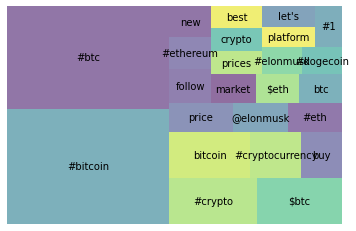

In [ ]:
wc_top25 = wc[wc['rank'] <= 25]
squarify.plot(sizes=wc_top25['percent'], label=wc_top25['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [ ]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [ ]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [ ]:
# 텍스트 데이터 전처리 진행 
cleantext=[]

for item in tqdm(df1['text']):
    words=tweet_to_words(item)
    cleantext+=[words]

df1['cleantext']=cleantext
df1

100%|██████████| 10000/10000 [00:43<00:00, 227.62it/s]


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleantext
0,319043,Hoba Bot,NaN,Fearless like a Honey Badger... Bears or Bulls...,2012-12-30 21:55:51,13144.0,7.0,143.0,False,2021-07-03 10:56:56,🚀🚀🚀 $ONT Long Position(v2) 🚀🚀🚀\n\nEntry: 0.717...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'ONTU...",HoBaBot,False,"[ont, long, posit, v2, entri, 0, 7179, target,..."
1,2561833,𝔡𝔢𝔣𝔦𝔱𝔯𝔞𝔩𝔦𝔷𝔢𝔡•pǝzıןɐɹʇıɟǝp,NaN,Defitralized © • DC of @_dcdao ...,2015-09-01 23:34:35,132.0,2387.0,8030.0,False,2022-03-15 09:40:37,10% discount\nhttps://t.co/1360Y2IRC7\n\n #BTC...,"['BTC', 'InLiqWeTrust']",Twitter for Android,False,"[10, discount, http, co, 1360y2irc7, btc, inli..."
2,2270121,GORE I.A.D,Deutschland,telegram https://t.co/ui9meh3B41\nMOD https://...,2021-12-03 13:05:19,44.0,397.0,5689.0,False,2022-02-09 18:35:47,@crypto_bearr Join us In #Aether Before the la...,"['Aether', 'ATH', 'AETHER', 'AETHERV2', 'BNB',...",Twitter for Android,False,"[crypto, bearr, join, us, aether, launch, sate..."
3,1739679,satsleft.info,The Bitcoin Timechain,Reporting on the remaining #Bitcoin supply to ...,2021-10-14 21:31:42,92.0,251.0,12.0,False,2021-11-11 17:17:32,👋 A new block was found on the #Bitcoin networ...,"['Bitcoin', 'bitcoin', 'sats']",satsleft,False,"[new, block, found, bitcoin, network, block, h..."
4,1894850,Dweep,NaN,"Vocalist, Musician, Author\n-CRYPTO maniac-",2017-08-17 15:01:18,8.0,49.0,283.0,False,2021-11-25 16:01:31,@CryptoWhale Its just whale games. Plan B made...,['Bitcoin'],Twitter for Android,False,"[cryptowhal, whale, game, plan, b, made, whole..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1968481,Bitcoin tips,NaN,NaN,2017-09-21 09:19:00,58.0,223.0,85.0,False,2021-12-17 13:26:16,@saylor It's almost ready to fly #Bitcoin,['Bitcoin'],Twitter for Android,False,"[saylor, almost, readi, fli, bitcoin]"
9996,1150428,Somnath Sahoo 💎,NaN,@Cardano @CotiNetwork \n@Ripple,2017-01-15 02:33:18,135.0,319.0,13924.0,False,2021-08-24 16:55:50,#Bitcoin New Price Predication 4th September 21,['Bitcoin'],Twitter for Android,False,"[bitcoin, new, price, predic, 4th, septemb, 21]"
9997,2159108,Zerinei Mooly,"Saint Andrews, Scotland",+100 I Per Day\n#pinetwork #BTC\n#polydoge,2013-09-30 12:11:16,186.0,591.0,654.0,False,2022-01-22 11:11:39,whoever buys bitcoin means he wins the future ...,"['coin', 'btc', 'bitcoin', 'crypto']",Twitter for Android,False,"[whoever, buy, bitcoin, mean, win, futur, mark..."
9998,2254421,GHC雄起,NaN,NaN,2022-01-17 03:06:46,1.0,4.0,212.0,False,2022-01-20 02:28:11,@VT6688 @GenxAnalytics @GalaxyHeroesGHC @rarib...,"['GalaxyHeroesCoin', 'GalaxyHeroes', 'GalaxyHe...",Twitter for Android,False,"[vt6688, genxanalyt, galaxyheroesghc, raribl, ..."


In [ ]:
# 클리닝이 진행된 데이터에 대해서 VADER 스코어를 측정 
df2 = compute_vader_scores(df1,'cleantext')
df2

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,319043,Hoba Bot,NaN,Fearless like a Honey Badger... Bears or Bulls...,2012-12-30 21:55:51,13144.0,7.0,143.0,False,2021-07-03 10:56:56,🚀🚀🚀 $ONT Long Position(v2) 🚀🚀🚀\n\nEntry: 0.717...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'ONTU...",HoBaBot,False,"[ont, long, posit, v2, entri, 0, 7179, target,...",0.128,0.872,0.000,-0.2960,ont long posit v2 entri 0 7179 target 0 7213 s...
1,2561833,𝔡𝔢𝔣𝔦𝔱𝔯𝔞𝔩𝔦𝔷𝔢𝔡•pǝzıןɐɹʇıɟǝp,NaN,Defitralized © • DC of @_dcdao ...,2015-09-01 23:34:35,132.0,2387.0,8030.0,False,2022-03-15 09:40:37,10% discount\nhttps://t.co/1360Y2IRC7\n\n #BTC...,"['BTC', 'InLiqWeTrust']",Twitter for Android,False,"[10, discount, http, co, 1360y2irc7, btc, inli...",0.000,1.000,0.000,0.0000,10 discount http co 1360y2irc7 btc inliqwetrus...
2,2270121,GORE I.A.D,Deutschland,telegram https://t.co/ui9meh3B41\nMOD https://...,2021-12-03 13:05:19,44.0,397.0,5689.0,False,2022-02-09 18:35:47,@crypto_bearr Join us In #Aether Before the la...,"['Aether', 'ATH', 'AETHER', 'AETHERV2', 'BNB',...",Twitter for Android,False,"[crypto, bearr, join, us, aether, launch, sate...",0.000,0.936,0.064,0.2960,crypto bearr join us aether launch satellit or...
3,1739679,satsleft.info,The Bitcoin Timechain,Reporting on the remaining #Bitcoin supply to ...,2021-10-14 21:31:42,92.0,251.0,12.0,False,2021-11-11 17:17:32,👋 A new block was found on the #Bitcoin networ...,"['Bitcoin', 'bitcoin', 'sats']",satsleft,False,"[new, block, found, bitcoin, network, block, h...",0.293,0.707,0.000,-0.7003,new block found bitcoin network block height 7...
4,1894850,Dweep,NaN,"Vocalist, Musician, Author\n-CRYPTO maniac-",2017-08-17 15:01:18,8.0,49.0,283.0,False,2021-11-25 16:01:31,@CryptoWhale Its just whale games. Plan B made...,['Bitcoin'],Twitter for Android,False,"[cryptowhal, whale, game, plan, b, made, whole...",0.000,0.791,0.209,0.7003,cryptowhal whale game plan b made whole market...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1968481,Bitcoin tips,NaN,NaN,2017-09-21 09:19:00,58.0,223.0,85.0,False,2021-12-17 13:26:16,@saylor It's almost ready to fly #Bitcoin,['Bitcoin'],Twitter for Android,False,"[saylor, almost, readi, fli, bitcoin]",0.000,1.000,0.000,0.0000,saylor almost readi fli bitcoin
9996,1150428,Somnath Sahoo 💎,NaN,@Cardano @CotiNetwork \n@Ripple,2017-01-15 02:33:18,135.0,319.0,13924.0,False,2021-08-24 16:55:50,#Bitcoin New Price Predication 4th September 21,['Bitcoin'],Twitter for Android,False,"[bitcoin, new, price, predic, 4th, septemb, 21]",0.000,1.000,0.000,0.0000,bitcoin new price predic 4th septemb 21
9997,2159108,Zerinei Mooly,"Saint Andrews, Scotland",+100 I Per Day\n#pinetwork #BTC\n#polydoge,2013-09-30 12:11:16,186.0,591.0,654.0,False,2022-01-22 11:11:39,whoever buys bitcoin means he wins the future ...,"['coin', 'btc', 'bitcoin', 'crypto']",Twitter for Android,False,"[whoever, buy, bitcoin, mean, win, futur, mark...",0.000,0.774,0.226,0.5859,whoever buy bitcoin mean win futur market coin...
9998,2254421,GHC雄起,NaN,NaN,2022-01-17 03:06:46,1.0,4.0,212.0,False,2022-01-20 02:28:11,@VT6688 @GenxAnalytics @GalaxyHeroesGHC @rarib...,"['GalaxyHeroesCoin', 'GalaxyHeroes', 'GalaxyHe...",Twitter for Android,False,"[vt6688, genxanalyt, galaxyheroesghc, raribl, ...",0.000,0.893,0.107,0.5574,vt6688 genxanalyt galaxyheroesghc raribl theuf...
